### Write a paragraph based on your interested Domain and that should incorporate the special characters, punctuations, stop words, negation (don’t), Email Id, Phone Numberand Date of birth (27-March -2000).

In [80]:
text="Hello everyone, my name is Himanshu Gulechha. I was born on 17-January-2000. My E-mail ID is gulechhah@gmail.com and my phone number is 8762531515. I won't be going for the air show happening on 12-June-2024 ( I don't know to how to fly a plane ) ✈️😎 ❌"
text

"Hello everyone, my name is Himanshu Gulechha. I was born on 17-January-2000. My E-mail ID is gulechhah@gmail.com and my phone number is 8762531515. I won't be going for the air show happening on 12-June-2024 ( I don't know to how to fly a plane ) ✈️😎 ❌"

### preprocessing text by converting to lower case and removing punctuations

In [81]:
text=text.lower()
text

"hello everyone, my name is himanshu gulechha. i was born on 17-january-2000. my e-mail id is gulechhah@gmail.com and my phone number is 8762531515. i won't be going for the air show happening on 12-june-2024 ( i don't know to how to fly a plane ) ✈️😎 ❌"

In [82]:
import re
res = re.sub(r'[^\w\s]', '', text)
print(res)

hello everyone my name is himanshu gulechha i was born on 17january2000 my email id is gulechhahgmailcom and my phone number is 8762531515 i wont be going for the air show happening on 12june2024  i dont know to how to fly a plane   


### Counting the number of unique tokens in the text.

In [83]:
from nltk.tokenize import word_tokenize
res=word_tokenize(res)
unique=set(res)
len(unique)

35

### Counting the number of punctuation characters and removing the same

In [84]:
from string import punctuation
count=0
for i in text:
    if i in punctuation:
        count+=1
print(count)

15


In [85]:
res = re.sub(r'[^\w\s]', '', text)
print(res)

hello everyone my name is himanshu gulechha i was born on 17january2000 my email id is gulechhahgmailcom and my phone number is 8762531515 i wont be going for the air show happening on 12june2024  i dont know to how to fly a plane   


### Plotting the distribution of stopwords used in the text using barplot.

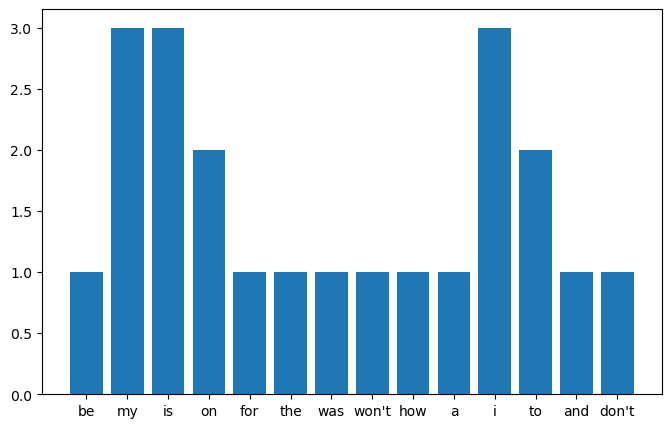

In [146]:
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
stop=[]
for i in text.split(" "):
    if i in stopwords.words('english'):
        stop.append(i)
unique=list(set(stop))
plt.figure(figsize=(8,5))
counts = [stop.count(value) for value in unique]
barcontainer = plt.bar(unique,counts)

### Removing the stopwords from the text.

In [87]:
filtered_sentence = [w for w in text.split() if not w.lower() in set(stopwords.words('english'))]
print(filtered_sentence)

['hello', 'everyone,', 'name', 'himanshu', 'gulechha.', 'born', '17-january-2000.', 'e-mail', 'id', 'gulechhah@gmail.com', 'phone', 'number', '8762531515.', 'going', 'air', 'show', 'happening', '12-june-2024', '(', 'know', 'fly', 'plane', ')', '✈️😎', '❌']


### Plotting the distribution of each POS Tag using a barplot.

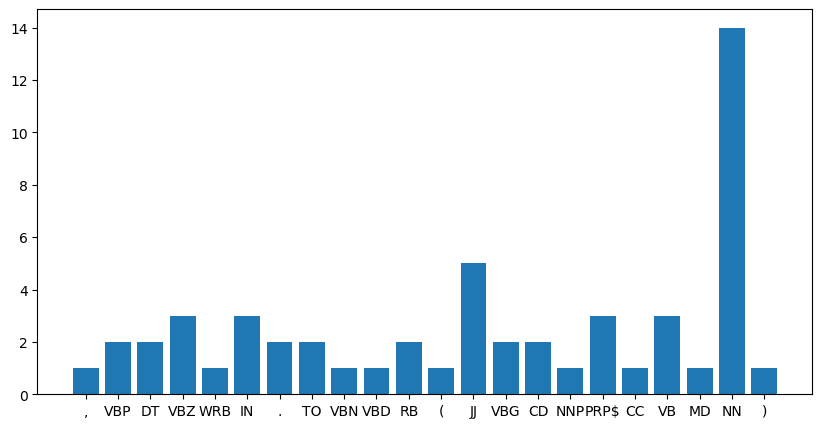

In [145]:
from nltk import pos_tag
stop=[word[1] for word in pos_tag(word_tokenize(text))]
unique=list(set(stop))
plt.figure(figsize=(10,5))
counts = [stop.count(value) for value in unique]
barcontainer = plt.bar(unique,counts)

### Determining the number of unique lemma available in the text.

In [104]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
lemmas=set()
for i in text.split():
    lemmas.add(lemmatizer.lemmatize(i,pos='v'))
len(lemmas)

37

### Plotting the frequency distribution of words in the text. Displaying only the top 5 (most occurring) tokens in the chart.

<BarContainer object of 5 artists>

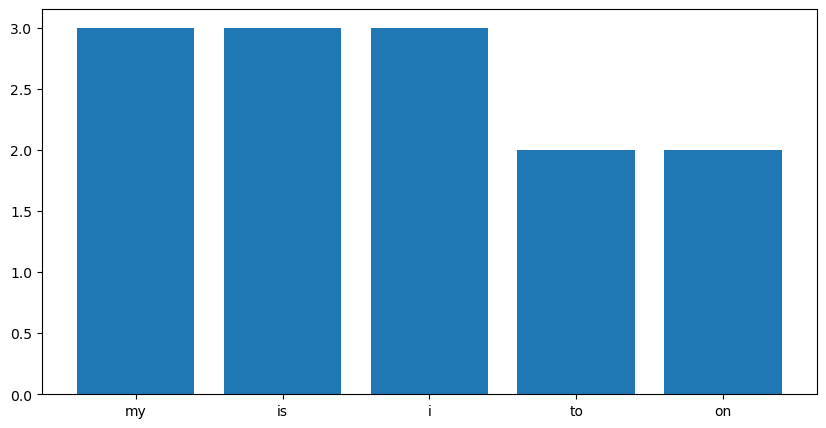

In [163]:
words=list(set(word for word in res.split()))
plt.figure(figsize=(10,5))
counts = [res.split().count(value) for value in words]
data={}
for key in words:
    for value in counts:
        data[key] = value
        counts.remove(value)
        break
data=dict(sorted(data.items(), key=lambda item: item[1], reverse=True))
plt.bar(list(data.keys())[:5],list(data.values())[:5])

### Finding the number of unique bigrams, trigrams and quadgrams (n=4) in the corpus

In [130]:
from nltk.util import ngrams
n = 2
bi_total=set()
bigrams = ngrams(text.split(), n)
for item in bigrams:
    bi_total.add(item)
len(bi_total)

46

In [131]:
n = 3
tri_total=set()
trigrams = ngrams(text.split(), n)
for item in trigrams:
    tri_total.add(item)
len(tri_total)

45

In [132]:
n = 4
quad_total=set()
quadgrams = ngrams(text.split(), n)
for item in quadgrams:
    quad_total.add(item)
len(quad_total)

44

### Finding all dates and converting them to the DD-MM-YYYY format.

In [181]:
from datetime import datetime
date_pattern = r'\b(\d{1,2})-(january|february|march|april|may|june|july|august|september|october|november|december)-(\d{4})\b'
def replace_date(match):
    day, month, year = match.groups()
    dt = datetime.strptime(f"{day}-{month}-{year}", "%d-%B-%Y")
    return dt.strftime("%d-%m-%Y")
formatted_text = re.sub(date_pattern, replace_date, text)
print(formatted_text)

hello everyone, my name is himanshu gulechha. i was born on 17-01-2000. my e-mail id is gulechhah@gmail.com and my phone number is 8762531515. i won't be going for the air show happening on 12-06-2024 ( i don't know to how to fly a plane ) ✈️😎 ❌


### Finding different values of year occurring in the text.

In [187]:
year_pattern = r'\b\d{4}\b'
years = re.findall(year_pattern, text)
years

['2000', '2024']

### Determining whether the text contains any phone numbers in it.

In [188]:
phone_pattern = r'\b\d{10}\b'
phone_numbers = re.findall(phone_pattern, text)
phone_numbers


['8762531515']